In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

__1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):<br>
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],<br>
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].<br>
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.__

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = 10
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
print(f"b = {b: .4f}")

b =  2.6205


In [3]:
a = np.mean(y) - b * np.mean(x)
print(f"a = {a: .4f}")


a =  444.1774


Уравнение регрессии имеет вид (коэффициенты округлены до сотых)<br>
$y=a+b\cdot x;$<br>
$y=444.2+2.6 \cdot x$

Найдем коэффициент корреляции $r$ с помощью коэффициента $b$ и средних квадратических отклонений посчитанных для массивов $x$ и $y$:

In [4]:
r = b * np.std(x) / np.std(y)
r

0.8874900920739162

Найдем коэффициент детерминации $R^2$

In [5]:
R2 = r**2
R2

0.7876386635293682

Это означает, что 78.76 % значений скоринговых баллов $(y)$ объясняются вариацией фактора ч - заработной платой.<br>
$y_{пред.}=a+bx$<br>
С помощью этого уравнения регрессии посчитаем значения, предсказанное моделью:

In [6]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Качество модели найдем с помощью средней ошибки аппроксимации $A_{ср.}$:

In [7]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.46925184356171

Так как $A_{ср.} = 11.5$%, что привышает $10$%, модель плохо описывает эмпирические данные. Для оценки значимости уравнения регрессии воспользуемся <font color = red> $F-критерием Фишера$ </font>. Найдем фактисеское значение $(F_{факт.})$:

In [8]:
F_fact = (r**2 * (n-2)) / (1 - r**2)
F_fact

29.671640859664432

При 5% уровне значимости и степени свободы $k_1=1 и k_2=10-2=8$ табличное значение $F_{кр.}=5.32$. Так как $F_{факт.}=20.79>F_{кр.}=5.32$, уравнение регрессии статистически значимо. 

Для оценки статистической значимости параметров регрессии воспользуемся t-статистикой Стьюдента и также рассчитаем доверительные интервалы каждого из показателей. При $df=n-2=10-2=8$ и $\alpha=0.05$ получим (см. Таблицу критических значений t-критерия Стьюдента):<br>
$$t_{кр.} = 2.306$$

Определим стандартную ошибку $S_{ост.}$ и случайные ошибки $m_a$, $m_b$.

In [9]:
s_residual = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))
print(f"s_residual = {s_residual}")
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
print(f"m_a = {m_a}")
m_b = s_residual / (np.std(x) * np.sqrt(n))
print(f"m_b = {m_b}")

s_residual = 89.93340731602925
m_a = 56.466497550681524
m_b = 0.48108279568516


Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [10]:
t_a = a / m_a
t_a

7.866210524668864

In [11]:
t_b = b / m_b
t_b

5.447168150485579

Фактические значения <font color = red>$t-статистики$</font> больше табличного значения:

$$t_a =7.8662>t_{кр.}=2.306, t_b =5.4472>t_{кр.}=2.306$$

Поэтому параметры $a$ и $b$ статистически значимы.

Рассчитаем доверительные интервалы для параметров регрессии $a$ и $b$. Для этого определим предельную ошибку для каждого показателя ($\Delta_a$ и $\Delta_b$) используя значение $t_{кр.} = 2.306$:

In [12]:
t_cr = 2.306

delta_a = t_cr * m_a
delta_a

130.2117433518716

In [13]:
delta_b = t_cr * m_b
delta_b

1.109376926849979

Найдем границы доверительных интервалах $\Upsilon_{a_{min}}$, $\Upsilon_{a_{max}}$, $\Upsilon_{b_{min}}$, $\Upsilon_{b_{max}}$ 

In [14]:
gamma_a_min = a - delta_a;
gamma_a_max = a + delta_a;
gamma_b_min = b - delta_b;
gamma_b_max = b + delta_b;
print(f"a->[{gamma_a_min: .4f}, {gamma_a_max: .4f}]")
print(f"b->[{gamma_b_min: .4f}, {gamma_b_max: .4f}]")

a->[ 313.9656,  574.3891]
b->[ 1.5112,  3.7299]


С вероятностью 95% параметры $a$ и $b$, находятся в указанных границах, являются статистически значимыми и отличны от нуля.<br>
Поместим исходные и предсказанные значения в датафрейм __df__:

In [15]:
df = pd.DataFrame({'x':x,'y':y,'y_pred':y_pred}, columns=['x','y','y_pred'])
df

,x,y,y_pred
0,35,401,535.896218
1,45,574,562.101607
2,190,874,942.079745
3,200,919,968.285134
4,40,459,548.998913
5,70,739,627.615079
6,54,653,585.686457
7,150,902,837.258190
8,120,746,758.642023
9,110,832,732.436634


In [16]:
df = df.sort_values('x')
df

,x,y,y_pred
0,35,401,535.896218
4,40,459,548.998913
1,45,574,562.101607
6,54,653,585.686457
5,70,739,627.615079
9,110,832,732.436634
8,120,746,758.642023
7,150,902,837.258190
2,190,874,942.079745
3,200,919,968.285134


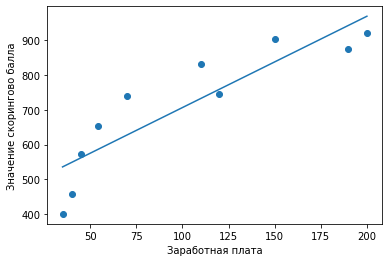

In [17]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Заработная плата')
plt.ylabel('Значение скорингово балла')
plt.show()